# Lecture 10: `xarray` for multi-dimensional data
2019-06-25

Course material is available at http://unihb.eu/pdap2019

## References

- https://xarray.pydata.org/
- https://rabernat.github.io/research_computing/xarray.html

![](https://raw.githubusercontent.com/pydata/xarray/master/doc/_static/dataset-diagram.png)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import xarray as xr

In [3]:
da = xr.DataArray([9, 0, 2, 1, 0])
da

<xarray.DataArray (dim_0: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: dim_0

In [4]:
da = xr.DataArray([9, 0, 2, 1, 0], dims=['x'])
da

<xarray.DataArray (x: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: x

In [5]:
da = xr.DataArray([9, 0, 2, 1, 0], dims=['x'], coords={'x': [10, 20, 30, 40, 50]})
da

<xarray.DataArray (x: 5)>
array([9, 0, 2, 1, 0])
Coordinates:
  * x        (x) int64 10 20 30 40 50

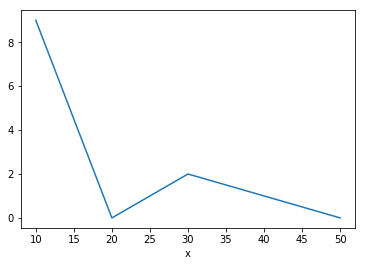

In [6]:
da.plot();

### Multi-dimensional `DataArray`

**NOTE:** You can read/write numpy arrays using `np.load` and `np.save`, see https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.load.html

In [7]:
argo_data = np.load('/data/pdap/xarray/argo_float_4901412.npz')
list(argo_data.keys())

['S', 'T', 'levels', 'lon', 'date', 'P', 'lat']

In [8]:
S = argo_data.f.S
T = argo_data.f.T
P = argo_data.f.P
levels = argo_data.f.levels
lon = argo_data.f.lon
lat = argo_data.f.lat
date = argo_data.f.date
print(S.shape, lon.shape, date.shape)

(78, 75) (75,) (75,)


In [9]:
da_salinity = xr.DataArray(S, dims=['level', 'date'],
                           coords={'level': levels, 'date': date})
da_salinity

<xarray.DataArray (level: 78, date: 75)>
array([[35.638939, 35.514957, 35.572971, ..., 35.820938, 35.777939, 35.668911],
       [35.633938, 35.521957, 35.573971, ..., 35.810932, 35.583897, 35.667912],
       [35.681946, 35.525959, 35.572971, ..., 35.795929, 35.662907, 35.665913],
       ...,
       [34.915859, 34.923904, 34.923904, ..., 34.934811, 34.940811, 34.946808],
       [34.915859, 34.923904, 34.921906, ..., 34.932808, 34.93681 , 34.94381 ],
       [34.917858, 34.923904, 34.923904, ...,       nan, 34.93681 ,       nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400

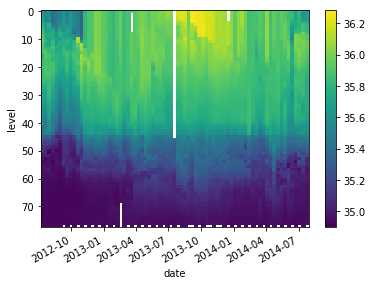

In [10]:
da_salinity.plot(yincrease=False)

In [11]:
da_salinity.attrs['units'] = 'PSU'
da_salinity.attrs['standard_name'] = 'sea_water_salinity'
da_salinity

<xarray.DataArray (level: 78, date: 75)>
array([[35.638939, 35.514957, 35.572971, ..., 35.820938, 35.777939, 35.668911],
       [35.633938, 35.521957, 35.573971, ..., 35.810932, 35.583897, 35.667912],
       [35.681946, 35.525959, 35.572971, ..., 35.795929, 35.662907, 35.665913],
       ...,
       [34.915859, 34.923904, 34.923904, ..., 34.934811, 34.940811, 34.946808],
       [34.915859, 34.923904, 34.921906, ..., 34.932808, 34.93681 , 34.94381 ],
       [34.917858, 34.923904, 34.923904, ...,       nan, 34.93681 ,       nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
Attributes:
    units:          PSU
    standard_name:  sea_water_salinity

Metadata is used when xarray creates a plot

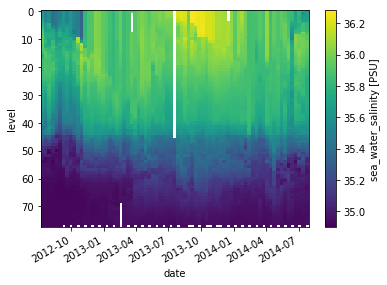

In [12]:
da_salinity.plot(yincrease=False)

### `Dataset`s

In [13]:
argo  = xr.Dataset(
    data_vars={'salinity': (('level', 'date'), S),
               'temperature': (('level', 'date'), T),
               'pressure': (('level', 'date'), P)},
    coords={'level': levels, 'date': date})
argo

<xarray.Dataset>
Dimensions:      (date: 75, level: 78)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan
    pressure     (level, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan

The following is wrong, because `lon` is not following dimension `date`:

In [14]:
argo['lon'] = lon
argo

<xarray.Dataset>
Dimensions:      (date: 75, level: 78, lon: 75)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
  * lon          (lon) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan
    pressure     (level, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan

When an array should follow a specific dimension, we need to assign using a tuple of (dimension, array):

In [15]:
del argo['lon']
argo['lon'] = ('date', lon)
argo['lat'] = ('date', lat)
argo

<xarray.Dataset>
Dimensions:      (date: 75, level: 78)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan
    pressure     (level, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38

When doing arithmetic with an array, this will now also affect `lat` and `lon`, because they are *data variables

In [16]:
argo * 10000

<xarray.Dataset>
Dimensions:      (date: 75, level: 78)
Coordinates:
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
Data variables:
    salinity     (level, date) float64 3.564e+05 3.551e+05 ... 3.494e+05 nan
    temperature  (level, date) float64 1.897e+05 1.844e+05 ... 3.714e+04 nan
    pressure     (level, date) float64 6.8e+04 6.1e+04 6.5e+04 ... nan 2e+07 nan
    lon          (date) float64 -3.913e+05 -3.728e+05 ... -3.411e+05 -3.438e+05
    lat          (date) float64 4.719e+05 4.672e+05 ... 4.246e+05 4.238e+05

So we make them *coordinates* instead:

In [17]:
argo = argo.set_coords(['lat', 'lon'])
argo

<xarray.Dataset>
Dimensions:      (date: 75, level: 78)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
Data variables:
    salinity     (level, date) float64 35.64 35.51 35.57 35.4 ... nan 34.94 nan
    temperature  (level, date) float64 18.97 18.44 19.1 19.79 ... nan 3.714 nan
    pressure     (level, date) float64 6.8 6.1 6.5 5.0 ... 2e+03 nan 2e+03 nan

which makes them invariate to arithmetic:

In [18]:
argo * 10000

<xarray.Dataset>
Dimensions:      (date: 75, level: 78)
Coordinates:
    lon          (date) float64 -39.13 -37.28 -36.9 ... -33.83 -34.11 -34.38
    lat          (date) float64 47.19 46.72 46.45 46.23 ... 42.6 42.46 42.38
  * date         (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
Data variables:
    salinity     (level, date) float64 3.564e+05 3.551e+05 ... 3.494e+05 nan
    temperature  (level, date) float64 1.897e+05 1.844e+05 ... 3.714e+04 nan
    pressure     (level, date) float64 6.8e+04 6.1e+04 6.5e+04 ... nan 2e+07 nan

### Selecting data

#### Selecting `DataArray` objects from a `Dataset`

as with pandas DataFrame objects, we can select DataArrays from a Dataset either using dict notation (`ds['varname']`) or using dot-notation (`ds.varname`):

In [19]:
argo['salinity']

<xarray.DataArray 'salinity' (level: 78, date: 75)>
array([[35.638939, 35.514957, 35.572971, ..., 35.820938, 35.777939, 35.668911],
       [35.633938, 35.521957, 35.573971, ..., 35.810932, 35.583897, 35.667912],
       [35.681946, 35.525959, 35.572971, ..., 35.795929, 35.662907, 35.665913],
       ...,
       [34.915859, 34.923904, 34.923904, ..., 34.934811, 34.940811, 34.946808],
       [34.915859, 34.923904, 34.921906, ..., 34.932808, 34.93681 , 34.94381 ],
       [34.917858, 34.923904, 34.923904, ...,       nan, 34.93681 ,       nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38

In [20]:
argo.salinity

<xarray.DataArray 'salinity' (level: 78, date: 75)>
array([[35.638939, 35.514957, 35.572971, ..., 35.820938, 35.777939, 35.668911],
       [35.633938, 35.521957, 35.573971, ..., 35.810932, 35.583897, 35.667912],
       [35.681946, 35.525959, 35.572971, ..., 35.795929, 35.662907, 35.665913],
       ...,
       [34.915859, 34.923904, 34.923904, ..., 34.934811, 34.940811, 34.946808],
       [34.915859, 34.923904, 34.921906, ..., 34.932808, 34.93681 , 34.94381 ],
       [34.917858, 34.923904, 34.923904, ...,       nan, 34.93681 ,       nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38

#### Selecting slices (array notation)

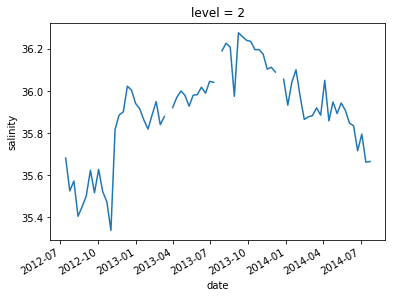

In [21]:
argo.salinity[2].plot();

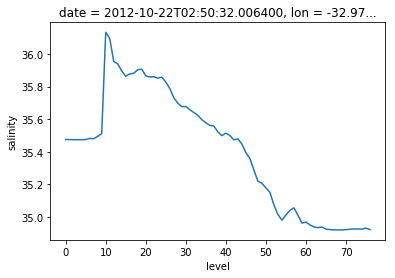

In [22]:
argo.salinity[:, 10].plot();

#### Selecting slices (coordinate notation)

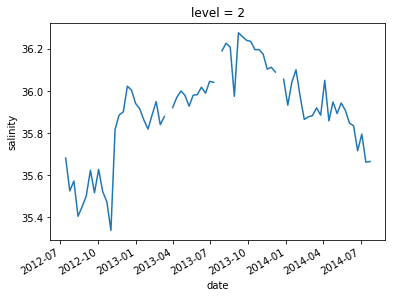

In [23]:
argo.salinity.sel(level=2).plot();

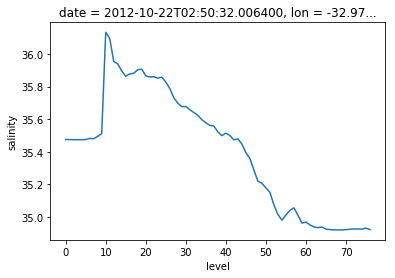

In [24]:
argo.salinity.sel(date='2012-10-22').plot()

In [25]:
argo.salinity.sel(date='2012-10-22', level=22)

<xarray.DataArray 'salinity' (date: 1)>
array([35.860882])
Coordinates:
    level    int64 22
  * date     (date) datetime64[ns] 2012-10-22T02:50:32.006400
    lon      (date) float64 -32.97
    lat      (date) float64 44.13

In [26]:
argo.salinity.sel(date=slice('2012-10-01', '2012-12-01'))

<xarray.DataArray 'salinity' (level: 78, date: 7)>
array([[35.630978, 35.525925, 35.474831, ..., 35.818966, 35.888939, 35.901878],
       [35.630978, 35.522923, 35.474831, ..., 35.817966, 35.887939, 35.901878],
       [35.627975, 35.522923, 35.473831, ..., 35.818966, 35.88694 , 35.901878],
       ...,
       [34.921906, 34.923859, 34.930763, ..., 34.93586 , 34.934811, 34.929859],
       [34.920906, 34.92186 , 34.921764, ..., 34.932858, 34.931808, 34.92786 ],
       [      nan, 34.919857,       nan, ...,       nan, 34.92181 ,       nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-10-02T03:00:17.971200 ... 2012-12-01T02:47:51.993600
    lon      (date) float64 -34.46 -33.78 -32.97 -32.55 -32.43 -32.29 -32.17
    lat      (date) float64 44.96 44.68 44.13 43.64 43.07 42.66 42.51

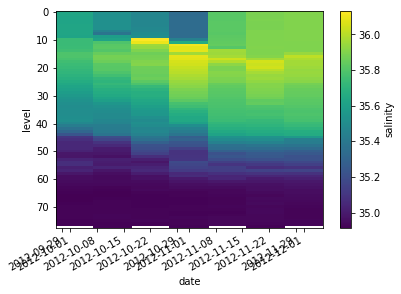

In [27]:
argo.salinity.sel(date=slice('2012-10-01', '2012-12-01')).plot(yincrease=False);

In [28]:
argo.sel(date='2012-10-22')

<xarray.Dataset>
Dimensions:      (date: 1, level: 78)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
  * date         (date) datetime64[ns] 2012-10-22T02:50:32.006400
    lon          (date) float64 -32.97
    lat          (date) float64 44.13
Data variables:
    salinity     (level, date) float64 35.47 35.47 35.47 ... 34.93 34.92 nan
    temperature  (level, date) float64 17.13 17.13 17.13 ... 3.736 3.639 nan
    pressure     (level, date) float64 6.4 10.3 15.4 ... 1.9e+03 1.951e+03 nan

### Computations

In [29]:
stupiddata = np.cos(argo.temperature) * np.sin(argo.salinity)**2
stupiddata

<xarray.DataArray (level: 78, date: 75)>
array([[ 0.773004,  0.612564,  0.699676, ...,  0.877114, -0.869736,  0.22923 ],
       [ 0.770304,  0.608147,  0.703475, ...,  0.839033,  0.599598,  0.233615],
       [ 0.721862,  0.60364 ,  0.70533 , ...,  0.727454,  0.731623,  0.269652],
       ...,
       [-0.097817, -0.100402, -0.101354, ..., -0.106767, -0.109675, -0.108444],
       [-0.099938, -0.103214, -0.103704, ..., -0.109936, -0.112806, -0.11175 ],
       [-0.102437, -0.105602, -0.10711 , ...,       nan, -0.115241,       nan]])
Coordinates:
  * level    (level) int64 0 1 2 3 4 5 6 7 8 9 ... 68 69 70 71 72 73 74 75 76 77
  * date     (date) datetime64[ns] 2012-07-13T22:33:06.019200 ... 2014-07-24T03:02:33.014400
    lon      (date) float64 -39.13 -37.28 -36.9 -36.89 ... -33.83 -34.11 -34.38
    lat      (date) float64 47.19 46.72 46.45 46.23 ... 42.72 42.6 42.46 42.38

Colormaps are selected automatically (blue/red for data with both positive and negative values)

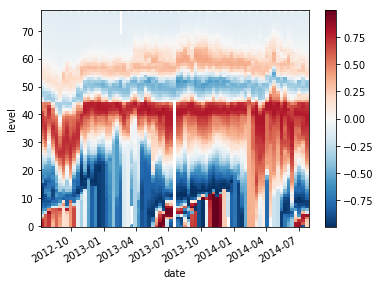

In [30]:
stupiddata.plot()

but of course we can manually select a colormap (see https://matplotlib.org/examples/color/colormaps_reference.html for a list of all available colormaps)

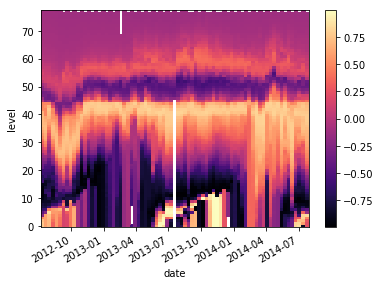

In [31]:
stupiddata.plot(cmap='magma')

#### Broadcasting

In xarray, broadcasting happens automatically (see https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html for broadcasting in NumPy)

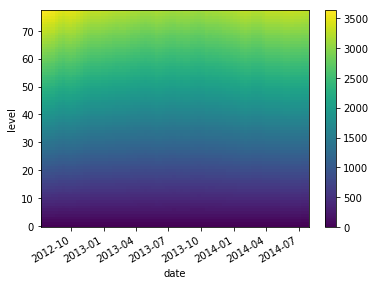

In [32]:
level_times_lat = argo.level  * argo.lat
level_times_lat.plot();

### Reduction

In [33]:
argo_mean = argo.mean(dim='date')
argo_mean

<xarray.Dataset>
Dimensions:      (level: 78)
Coordinates:
  * level        (level) int64 0 1 2 3 4 5 6 7 8 ... 69 70 71 72 73 74 75 76 77
Data variables:
    salinity     (level) float64 35.91 35.9 35.9 35.9 ... 34.94 34.94 34.93
    temperature  (level) float64 17.6 17.57 17.51 17.42 ... 3.789 3.73 3.662
    pressure     (level) float64 6.435 10.57 15.54 ... 1.95e+03 1.999e+03

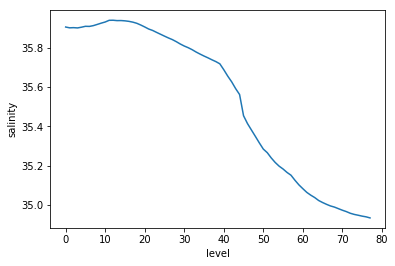

In [34]:
argo_mean.salinity.plot()

**NOTE:** In order to select data within a certain radius around a given location, see https://github.com/cistools/collocate

## Working with netCDF data / advanced xarray usage / looking at El Nino and La Nina

In [35]:
ds = xr.open_dataset('/data/pdap/xarray/NOAA_NCDC_ERSST_v3b_SST.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [36]:
sst = ds.sst
sst

<xarray.DataArray 'sst' (time: 684, lat: 89, lon: 180)>
[10957680 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Attributes:
    pointwidth:          1.0
    valid_min:           -3.0
    valid_max:           45.0
    units:               degree_Celsius
    long_name:           Extended reconstructed sea surface temperature
    standard_name:       sea_surface_temperature
    iridl:hasSemantics:  iridl:SeaSurfaceTemperature

/home/jupyterhub/conda/envs/prod/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


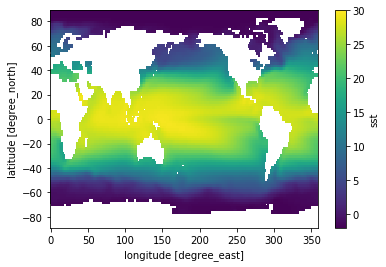

In [37]:
sst.mean(dim='time').plot(vmin=-2, vmax=30);

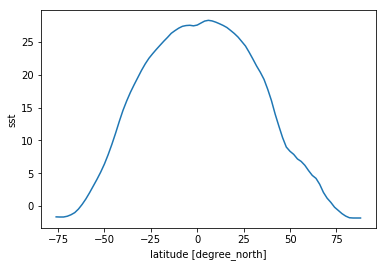

In [38]:
sst.mean(dim=('time', 'lon')).plot();

In [39]:
sst_zonal_mean = sst.mean(dim=('time', 'lon'))

In [40]:
sst.lat

<xarray.DataArray 'lat' (lat: 89)>
array([-88., -86., -84., -82., -80., -78., -76., -74., -72., -70., -68., -66.,
       -64., -62., -60., -58., -56., -54., -52., -50., -48., -46., -44., -42.,
       -40., -38., -36., -34., -32., -30., -28., -26., -24., -22., -20., -18.,
       -16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
         8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,  24.,  26.,  28.,  30.,
        32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,  48.,  50.,  52.,  54.,
        56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,  72.,  74.,  76.,  78.,
        80.,  82.,  84.,  86.,  88.], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
Attributes:
    standard_name:  latitude
    pointwidth:     2.0
    gridtype:       0
    units:          degree_north

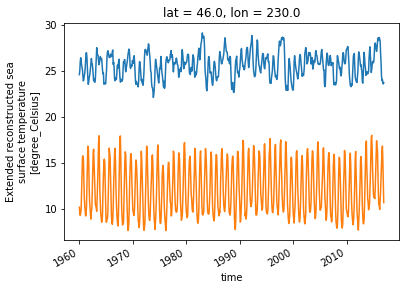

In [41]:
sst.sel(lon=230, lat=0).plot()
sst.sel(lon=230, lat=45, method='nearest').plot()

In [42]:
sst.time.dt.month

<xarray.DataArray 'month' (time: 684)>
array([ 1,  2,  3, ..., 10, 11, 12])
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15

In [43]:
sst_clim = sst.groupby('time.month').mean(dim='time')
sst_clim

<xarray.DataArray 'sst' (month: 12, lat: 89, lon: 180)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.800001, -1.800001, ..., -1.799981, -1.799988],
        [-1.800001, -1.800001, ..., -1.800001, -1.800001]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.799919, -1.799906, ..., -1.799992, -1.799933],
        [-1.800001, -1.800001, ..., -1.800001, -1.800001]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.798465, -1.798145, ..., -1.798996, -1.798736],
        [-1.799171, -1.799057, ..., -1.799308, -1.799222]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [-1.799274, -1.799195, ..., -1.799452, 

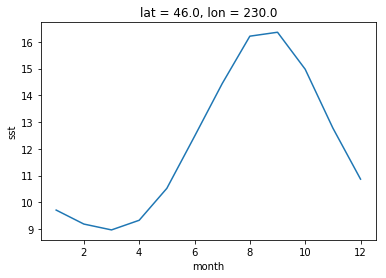

In [44]:
sst_clim.sel(lon=230, lat=45, method='nearest').plot()

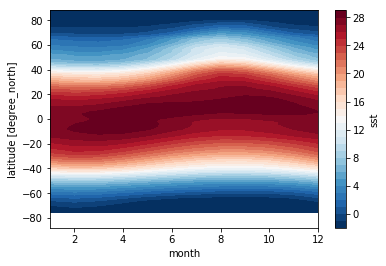

In [45]:
sst_clim.mean(dim='lon').T.plot.contourf(levels=np.arange(-2, 30))

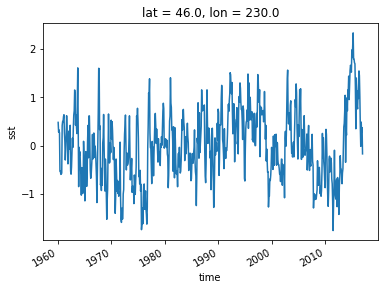

In [46]:
sst_anom = sst.groupby('time.month') - sst_clim
sst_anom.sel(lon=230, lat=45, method='nearest').plot()

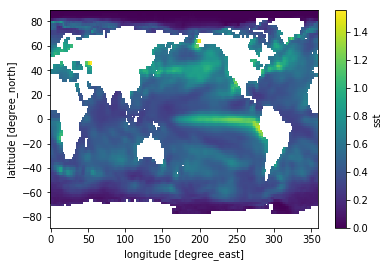

In [47]:
sst_anom.std(dim='time').plot()

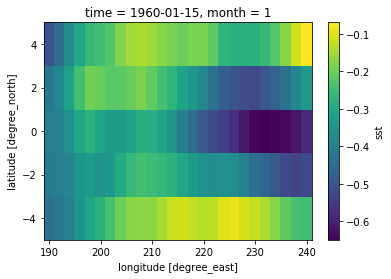

In [48]:
sst_anom_nino34 = sst_anom.sel(lat=slice(-5, 5), lon=slice(190, 240))
sst_anom_nino34[0].plot()

In [49]:
sst_anom_nino34_mean = sst_anom_nino34.mean(dim=('lat', 'lon'))
sst_anom_nino34_mean

<xarray.DataArray 'sst' (time: 684)>
array([-0.31958 , -0.468521, -0.268152, ..., -0.896676, -0.970773, -0.855261],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [50]:
oni = sst_anom_nino34_mean.rolling(time=3).mean(dim='time')
oni

<xarray.DataArray (time: 684)>
array([      nan,       nan, -0.352084, ..., -0.728147, -0.835824, -0.90757 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

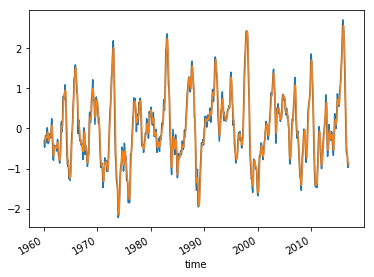

In [51]:
sst_anom_nino34_mean.plot()
oni.plot()

In [52]:
nino34 = xr.full_like(oni, 'none', dtype='U4')
nino34[oni >= 0.5] = 'nino'
nino34[oni <= -0.5] = 'nina'
nino34

<xarray.DataArray (time: 684)>
array(['none', 'none', 'none', ..., 'nina', 'nina', 'nina'], dtype='<U4')
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [53]:
sst_nino_composite = sst_anom.groupby(nino34.rename('nino34')).mean(dim='time')
sst_nino_composite

/home/jupyterhub/conda/envs/prod/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'sst' (nino34: 3, lat: 89, lon: 180)>
array([[[          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan],
        ...,
        [ 3.792187e-04,  4.499612e-04, ...,  2.051915e-04,  2.729138e-04],
        [ 2.518341e-04,  2.923963e-04, ...,  1.993680e-04,  2.300460e-04]],

       [[          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan],
        ...,
        [-2.791258e-04, -3.211944e-04, ..., -1.748656e-04, -2.064266e-04],
        [-1.247971e-04, -1.413706e-04, ..., -9.612105e-05, -1.087648e-04]],

       [[          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan],
        ...,
        [-6.892407e-05, -8.743002e-05, ..., -2.365712e-05, -4.614436e-05],
        [-7.784626e-05, -9.260711e-05, ..., -6.276814e-05, -7.382794e-05]]],

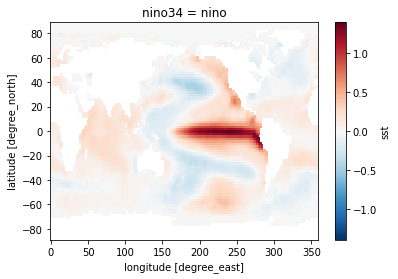

In [54]:
sst_nino_composite.sel(nino34='nino').plot()

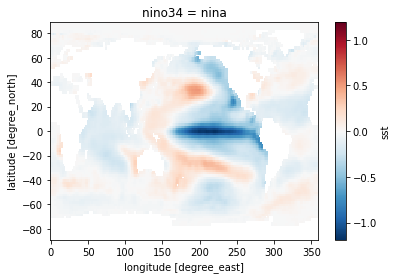

In [55]:
sst_nino_composite.sel(nino34='nina').plot()